,Date,Holiday
0,2021-02-14,San Valentín
3,2021-04-04,Pascua
1,2021-05-09,Día de la Madre
2,2021-07-04,Día de la Independencia
4,2021-10-31,Halloween
5,2021-12-25,Navidad
6,2022-02-14,San Valentín
9,2022-04-17,Pascua
7,2022-05-08,Día de la Madre
8,2022-07-04,Día de la Independencia


Número de registros que coinciden con fechas festivas: 4099


,Flower,Color,Stems,Year,Month,Day,Date,Es_Festividad
11,CDN,Assorted,182,2024,5,12,2024-05-12,Día de la Madre
17,Cremon,Assorted,90,2024,5,12,2024-05-12,Día de la Madre
22,Cushion,Assorted,182,2024,5,12,2024-05-12,Día de la Madre
46,Daisy,Assorted,364,2024,5,12,2024-05-12,Día de la Madre
92,Spider,Assorted,270,2024,5,12,2024-05-12,Día de la Madre
113,Minicarnation,Bicolor,2130,2022,4,17,2022-04-17,Pascua
180,Sparkz,Bicolor,5,2021,7,4,2021-07-04,Día de la Independencia
236,Daisy,Bicolor Bronze,9903,2021,10,31,2021-10-31,Halloween
326,Daisy,Bicolor Bronze,2906,2022,10,31,2022-10-31,Halloween
426,Daisy,Bicolor Bronze,9826,2023,10,31,2023-10-31,Halloween



Total de tallos por festividad (ordenado de mayor a menor):


,Es_Festividad,Stems
4,Pascua,2316936
2,Halloween,2206946
5,San Valentín,1120822
1,Día de la Madre,1119306
0,Día de la Independencia,1081166
3,Navidad,869250



Promedio diario de tallos por festividad:


,Es_Festividad,Stems,Dias,Promedio_Diario
0,Pascua,2316936,645,3592.148837
1,Halloween,2206946,992,2224.743952
3,Día de la Madre,1119306,595,1881.186555
5,Navidad,869250,469,1853.411514
2,San Valentín,1120822,699,1603.464950
4,Día de la Independencia,1081166,699,1546.732475


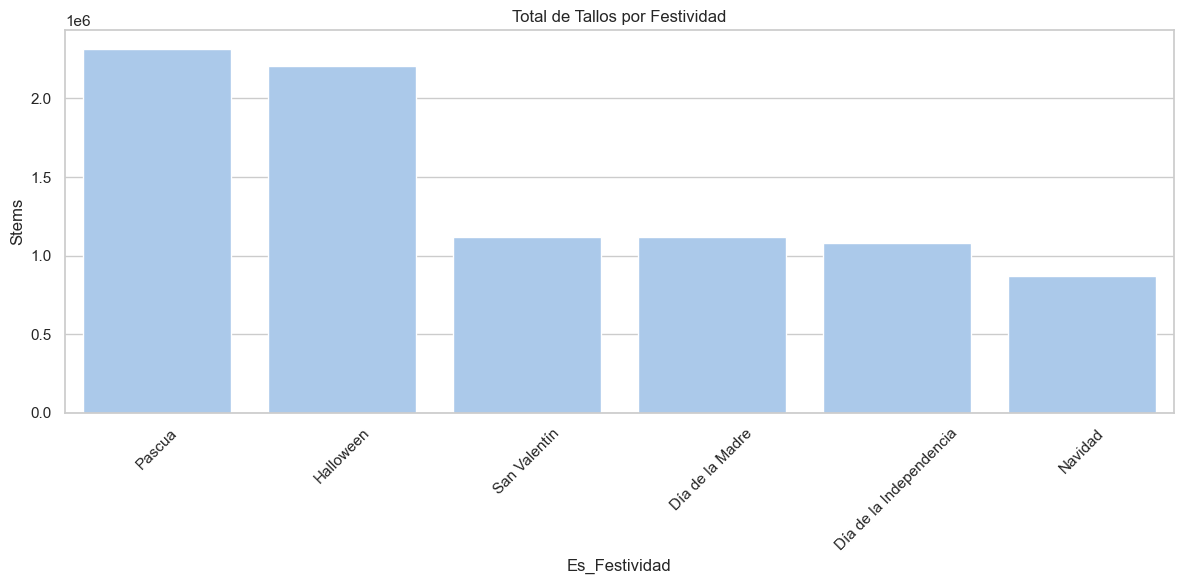

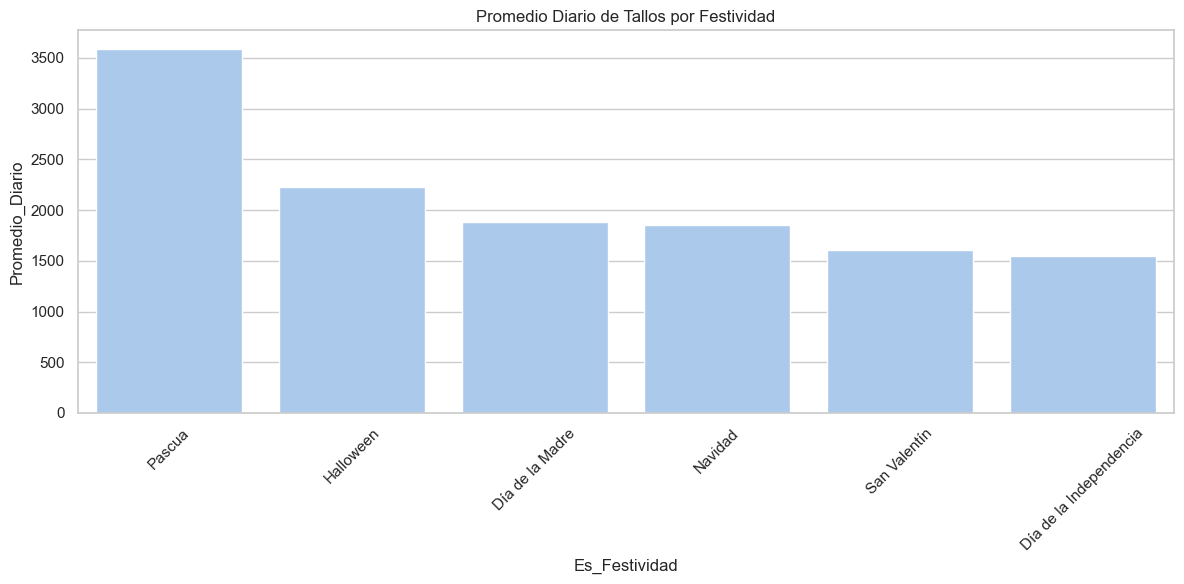

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos 
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Cargar los datos (usando la ruta correcta)
file_path = '../data/processed/merged_clean.csv'
df = pd.read_csv(file_path)

# Convertir a tipo datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Función para calcular Pascua
def easter_date(year):
    a = year % 19
    b = year // 100
    c = year % 100
    d = b // 4
    e = b % 4
    f = (b + 8) // 25
    g = (b - f + 1) // 3
    h = (19 * a + b - d - g + 15) % 30
    i = c // 4
    k = c % 4
    l = (32 + 2 * e + 2 * i - h - k) % 7
    m = (a + 11 * h + 22 * l) // 451
    month = (h + l - 7 * m + 114) // 31
    day = ((h + l - 7 * m + 114) % 31) + 1
    return datetime(year, month, day)

# Crear DataFrame de festividades
years = range(2021, 2025)
holiday_dates = []

for year in years:
    # San Valentín
    holiday_dates.append({'Date': datetime(year, 2, 14), 'Holiday': 'San Valentín'})
    
    # Día de la Madre (segundo domingo de mayo)
    first_day = datetime(year, 5, 1)
    days_until_sunday = (6 - first_day.weekday()) % 7
    first_sunday = first_day + timedelta(days=days_until_sunday)
    mothers_day = first_sunday + timedelta(days=7)
    holiday_dates.append({'Date': mothers_day, 'Holiday': 'Día de la Madre'})
    
    # Día de la Independencia
    holiday_dates.append({'Date': datetime(year, 7, 4), 'Holiday': 'Día de la Independencia'})
    
    # Pascua
    easter = easter_date(year)
    holiday_dates.append({'Date': easter, 'Holiday': 'Pascua'})
    
    # Halloween
    holiday_dates.append({'Date': datetime(year, 10, 31), 'Holiday': 'Halloween'})
    
    # Navidad
    holiday_dates.append({'Date': datetime(year, 12, 25), 'Holiday': 'Navidad'})

# Crear DataFrame
holidays_df = pd.DataFrame(holiday_dates)

# Mostrar fechas ordenadas
holidays_df_sorted = holidays_df.sort_values(by=['Date'])
display(holidays_df_sorted)

# Marcar festividades en el dataset
holiday_dict = {row['Date'].strftime('%Y-%m-%d'): row['Holiday'] for _, row in holidays_df.iterrows()}
df['Es_Festividad'] = df['Date'].dt.strftime('%Y-%m-%d').map(holiday_dict)

# Mostrar registros de fechas festivas
fechas_festivas = df[df['Es_Festividad'].notna()]
print("Número de registros que coinciden con fechas festivas:", len(fechas_festivas))
display(fechas_festivas.head(20))

# Analizar tallos por festividad
if 'Stems' in df.columns:
    # Agrupar por festividad y sumar los tallos
    tallos_por_festividad = fechas_festivas.groupby('Es_Festividad')['Stems'].sum().reset_index()
    
    # Ordenar por cantidad de tallos de mayor a menor
    tallos_por_festividad = tallos_por_festividad.sort_values(by='Stems', ascending=False)
    
    # Mostrar tabla
    print("\nTotal de tallos por festividad (ordenado de mayor a menor):")
    display(tallos_por_festividad)
    
    # También mostrar el promedio diario para comparar
    # Añadir conteo de días por festividad
    dias_por_festividad = fechas_festivas.groupby('Es_Festividad').size().reset_index(name='Dias')
    tallos_promedio = tallos_por_festividad.merge(dias_por_festividad, on='Es_Festividad')
    tallos_promedio['Promedio_Diario'] = tallos_promedio['Stems'] / tallos_promedio['Dias']
    tallos_promedio = tallos_promedio.sort_values(by='Promedio_Diario', ascending=False)
    print("\nPromedio diario de tallos por festividad:")
    display(tallos_promedio)
    
    # Visualizar
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Es_Festividad', y='Stems', data=tallos_por_festividad)
    plt.title('Total de Tallos por Festividad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Visualizar el promedio diario
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Es_Festividad', y='Promedio_Diario', data=tallos_promedio)
    plt.title('Promedio Diario de Tallos por Festividad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()